# K-Means Image Compression

In [3]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import utils

%matplotlib inline

'Image shape: (128, 128, 3)'

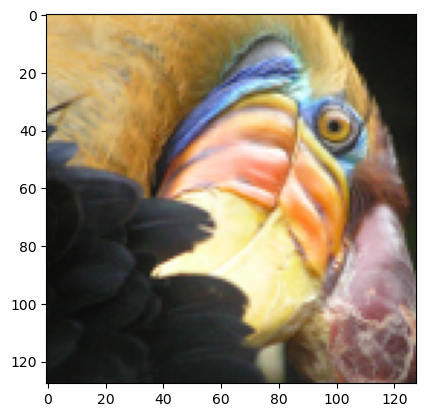

In [4]:
original_img = plt.imread('./images/bird_small.png')
plt.imshow(original_img)
f'Image shape: {original_img.shape}'

In [5]:
print(f'Pixel 58x43 Red intensity: {original_img[58, 43, 0]}')
print(f'Pixel 58x43 Green intensity: {original_img[58, 43, 1]}')
print(f'Pixel 58x43 Blue intensity: {original_img[58, 43, 2]}')
print('There\'s no need to divide each pixel by 255 since this is not JPEG')

Pixel 58x43 Red intensity: 0.6000000238418579
Pixel 58x43 Green intensity: 0.3960784375667572
Pixel 58x43 Blue intensity: 0.29019609093666077
There's no need to divide each pixel by 255 since this is not JPEG


In [6]:
# 2 dimensions representation: pixels will be represented linearly from pixel 1 to pixel (128x128=) 16384 (rows), RGB will the stored in 3 columns
X_img = original_img.reshape(original_img.shape[0] * original_img.shape[1], 3)  # (16384, 3)
X_img.shape

(16384, 3)

In [7]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [8]:
from mlutils import compute_centroids, run_kMeans

K = 16         # max colors
max_iter = 10

initial_centroids = kMeans_init_centroids(X_img, K)

centroids, idx = run_kMeans(X_img, initial_centroids, max_iter)

idx.shape, centroids


K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


<Figure size 800x600 with 0 Axes>

((16384,),
 array([[0.7743203 , 0.68925339, 0.66280442],
        [0.27830043, 0.24021685, 0.22142743],
        [0.68657112, 0.50758183, 0.24715766],
        [0.08976589, 0.09692563, 0.08624736],
        [0.95865524, 0.85531694, 0.64176816],
        [0.88123745, 0.59110409, 0.27279094],
        [0.1762252 , 0.17635502, 0.16981784],
        [0.06520382, 0.07099097, 0.0608855 ],
        [0.72557896, 0.61668253, 0.43271503],
        [0.5199191 , 0.38397539, 0.21256602],
        [0.8755551 , 0.72101247, 0.45319697],
        [0.52989239, 0.48431179, 0.49556148],
        [0.56371349, 0.70140624, 0.84846365],
        [0.96870053, 0.93848896, 0.82009596],
        [0.12163776, 0.13056411, 0.12133353],
        [0.37998891, 0.33460101, 0.33333173]]))

AttributeError: 'Axes3D' object has no attribute 'w_yaxis'

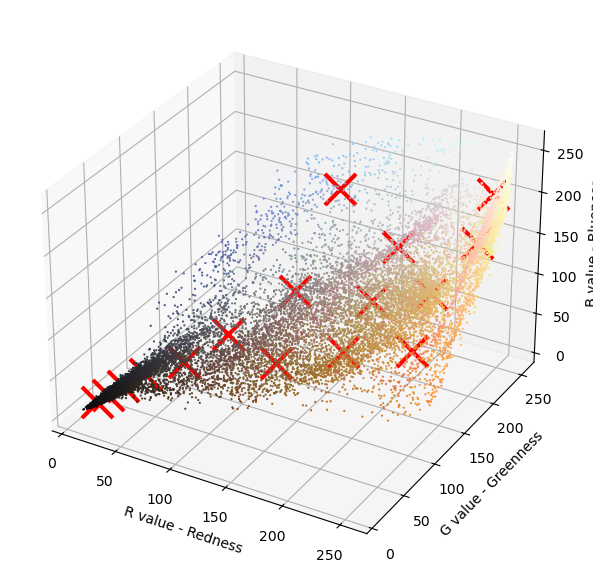

In [10]:
utils.plot_kMeans_RGB(X_img, centroids, idx, K)

In [16]:
centroids = compute_centroids(X_img, idx, K)
# Advanced indexing allows to use 16384 VALUES in idx to be used as indexes to ITERATIVELY index centroids 
# This only works because the values in idx are guaranteed to fall in 0..(centroids.shape[0]) (14)
X_recovered_matrix = centroids[idx, :]

compressed_img = X_recovered_matrix.reshape(original_img.shape)   # back to 128x128x3

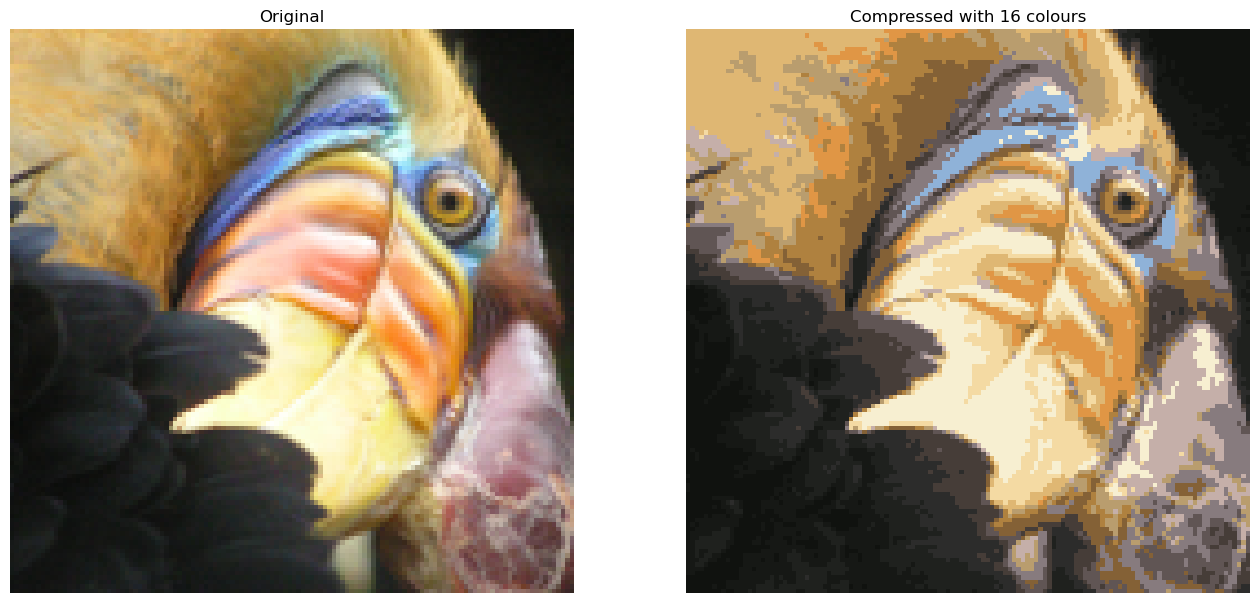

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(compressed_img)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()